<a href="https://colab.research.google.com/github/riacode/StanfordAI4ALL/blob/main/Week3_Lung_Cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## This notebook implements all the algorithms we learned in Week 2 of the camp on my dataset about lung cancer.

AI4ALL Camp Day 11

# Imports

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import io
import pandas as pd
import seaborn as sns
import math
from sklearn.model_selection import train_test_split
from sklearn import tree
from numpy import mean
from matplotlib import pyplot as plt
from collections import Counter
from google.colab import files
%matplotlib inline

In [ ]:
uploaded = files.upload()
data = pd.read_csv(io.BytesIO(uploaded['lung_normal_4tumors.csv']), encoding='utf-8')

Saving lung_normal_4tumors.csv to lung_normal_4tumors.csv


In [ ]:
data

,38691_s_at,37864_s_at,33273_f_at,33274_f_at,33501_r_at,33500_i_at,33499_s_at,41164_at,38194_s_at,37004_at,40808_at,41827_f_at,34105_f_at,41165_g_at,769_s_at,33699_at,31444_s_at,33383_f_at,37039_at,32052_at,32805_at,34301_r_at,33322_i_at,35566_f_at,35083_at,33377_at,34342_s_at,32252_at,36780_at,31687_f_at,37383_f_at,39248_at,34485_r_at,AFFX,35905_s_at,676_g_at,35530_f_at,39026_r_at,41237_at,AFFX-HUMGAPDH/M33197_5_at,...,31880_at,38383_at,475_at,1245_i_at,34096_at,33793_at,37112_at,36258_at,37090_at,38879_at,41334_r_at,35681_r_at,876_at,34938_i_at,37524_at,AFFX-TrpnX-M_at,32037_r_at,32301_at,32075_at,38525_at,35894_at,35259_s_at,34544_at,39742_at,32083_at,AFFX-CreX-5_at,38911_at,33628_g_at,32012_at,41848_f_at,32086_at,33886_at,31781_at,AFFX-BioC-3_at,41422_at,39964_at,36120_at,40571_at,36312_at,label
0,63.20,4196.25,3306.35,3330.86,1609.47,1597.32,1233.89,255.14,3036.53,8.92,16.210,1562.50,665.35,135.43,2397.58,98.890,2290.93,-4.03,1402.85,54.280,50.230,239.640,852.820,499.25,4182.14,-8.08,1887.45,0.010,559.250,114.310,4261.15,59.96,-414.300,2565.55,5090.71,4751.66,266.57,126.50,2528.43,2570.50,...,10.540,12.16,18.630,6.490,-2.410,-11.320,5.680,15.400,-9.700,-4.84,22.680,14.590,4.870,-6.460,4.870,-33.160,3.250,0.010,10.540,-5.65,-21.83,34.020,17.020,35.64,13.780,-22.640,6.490,-15.360,2.440,-17.790,18.630,51.040,-13.740,-29.120,-28.310,20.250,28.350,4.060,-19.41,0.0
1,965.47,6207.61,7077.04,6968.59,6569.86,6419.19,6908.34,4785.76,4562.19,1120.10,31.420,4152.27,4600.01,3480.65,2534.08,84.500,2141.00,234.08,2577.81,67.520,1723.450,78.130,433.870,3352.11,4389.94,30.36,1061.32,18.680,894.660,32.480,3910.93,1808.95,14.430,2362.42,4509.08,3496.16,3523.09,-2.56,2127.27,2402.53,...,21.860,11.24,22.920,17.610,0.630,-4.680,9.120,17.610,2.750,-1.50,20.800,20.800,18.680,-2.560,13.370,-7.870,14.430,10.180,26.110,13.37,9.12,27.170,22.920,27.17,20.800,-14.240,16.550,-6.810,11.240,-5.740,5.940,28.230,-4.680,-13.180,-13.180,21.860,9.120,11.240,8.06,0.0
2,2940.51,6858.12,6927.79,6495.99,5273.47,4672.48,5474.67,2140.99,5120.39,1212.90,-0.195,3623.89,1533.90,1187.76,3105.11,65.925,2784.31,476.26,2471.10,216.965,2565.110,278.155,819.100,1030.22,4743.80,16.71,1553.85,-1.125,797.565,101.705,3264.08,2372.18,-67.920,1861.83,5321.86,3302.88,1185.65,17.02,2027.95,1594.80,...,11.570,2.92,0.885,-0.810,-3.160,-14.575,-1.575,10.745,-9.295,2.47,20.535,10.815,2.735,-3.475,7.610,-25.205,5.175,0.995,22.235,1.28,-15.93,9.960,6.710,26.31,8.320,-19.730,9.905,-2.915,-0.250,-17.225,4.725,17.280,-6.590,-17.970,-16.070,10.195,17.285,6.920,-11.09,0.0
3,64.07,7016.91,7132.05,6983.44,6284.96,5504.68,6097.27,5885.41,5446.04,4422.72,-11.140,4812.18,3995.36,4282.76,2003.31,530.195,1914.52,1843.67,2398.00,251.770,392.635,186.300,804.645,3541.65,4335.57,34.69,880.48,-7.115,305.480,100.605,3880.54,926.18,-275.715,2340.89,5010.51,2895.65,4073.99,14.22,3546.41,1937.18,...,18.805,16.37,36.220,10.455,2.435,-4.520,13.895,12.290,-5.520,-7.52,9.915,15.845,9.915,-5.065,18.285,-15.445,11.395,-6.010,28.765,1.49,0.95,26.325,18.905,29.67,17.875,-7.555,17.290,-20.015,8.415,-10.525,11.930,38.755,-5.005,-21.445,-24.335,14.355,39.200,12.335,7.41,0.0
4,3451.94,6281.06,6650.54,6858.68,6007.37,5517.95,5729.06,3245.64,5717.88,4116.73,-8.060,3387.26,3122.34,2268.38,2882.63,281.930,2860.16,1748.75,3219.15,314.150,30.420,41.560,785.170,2513.71,5308.86,11.18,542.78,-24.270,442.720,126.530,4939.59,605.62,365.430,2317.04,4614.94,3636.69,1939.55,0.04,3158.30,2503.90,...,9.160,-1.98,21.310,-4.010,-4.010,-13.130,0.040,2.070,-4.010,-13.13,2.070,10.170,-6.030,-13.130,0.040,-25.280,-1.980,-1.980,7.130,0.04,-19.20,14.220,16.250,20.30,11.180,-30.350,-0.970,-6.030,-10.090,-11.100,-12.110,32.450,-16.170,-13.130,-18.190,11.180,14.220,5.110,-8.06,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

# Hierarchical Clustering

# Decision Trees

In [ ]:
from sklearn.metrics import accuracy_score
# Here, you can set criterion = "entropy" or "gini", which will determine
# what equation the decision tree will use to measure the quality of a split
#
# You can set max_features=None, "sqrt", or "log2", which will determine how many
# features the decision tree will use. Setting it to None will use all the features,
# sqrt will use sqrt(number of features) and log2 will use log2(number of features)
#
# Play around! What settings are best? Do they change for the different data sets?
decision_tree = tree.DecisionTreeClassifier(criterion="entropy", max_features=None)


X = data.loc[:, data.columns != 'label'] #Remove the label column
y = np.asarray(data.label)

# Partition the dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8) #With this, it will get all correct!

# Train the classifier
decision_tree.fit(X_train, y_train)

predictions_1 = decision_tree.predict(X_train)

print(accuracy_score(y_train, predictions_1))

1.0


[Text(852.2181818181818, 587.0880000000001, 'X[461] <= 275.07\nentropy = 1.457\nsamples = 162\nvalue = [113, 13, 5, 15, 16]'),
 Text(608.7272727272727, 456.624, 'X[2176] <= 94.665\nentropy = 0.917\nsamples = 141\nvalue = [113, 13, 0, 15, 0]'),
 Text(486.9818181818182, 326.1600000000001, 'X[688] <= 268.007\nentropy = 0.521\nsamples = 128\nvalue = [113, 0, 0, 15, 0]'),
 Text(243.4909090909091, 195.69600000000003, 'X[464] <= 1067.3\nentropy = 0.127\nsamples = 114\nvalue = [112, 0, 0, 2, 0]'),
 Text(121.74545454545455, 65.23200000000008, 'entropy = 0.0\nsamples = 112\nvalue = [112, 0, 0, 0, 0]'),
 Text(365.23636363636365, 65.23200000000008, 'entropy = 0.0\nsamples = 2\nvalue = [0, 0, 0, 2, 0]'),
 Text(730.4727272727273, 195.69600000000003, 'X[6201] <= 116.6\nentropy = 0.371\nsamples = 14\nvalue = [1, 0, 0, 13, 0]'),
 Text(608.7272727272727, 65.23200000000008, 'entropy = 0.0\nsamples = 13\nvalue = [0, 0, 0, 13, 0]'),
 Text(852.2181818181818, 65.23200000000008, 'entropy = 0.0\nsamples = 1\nv

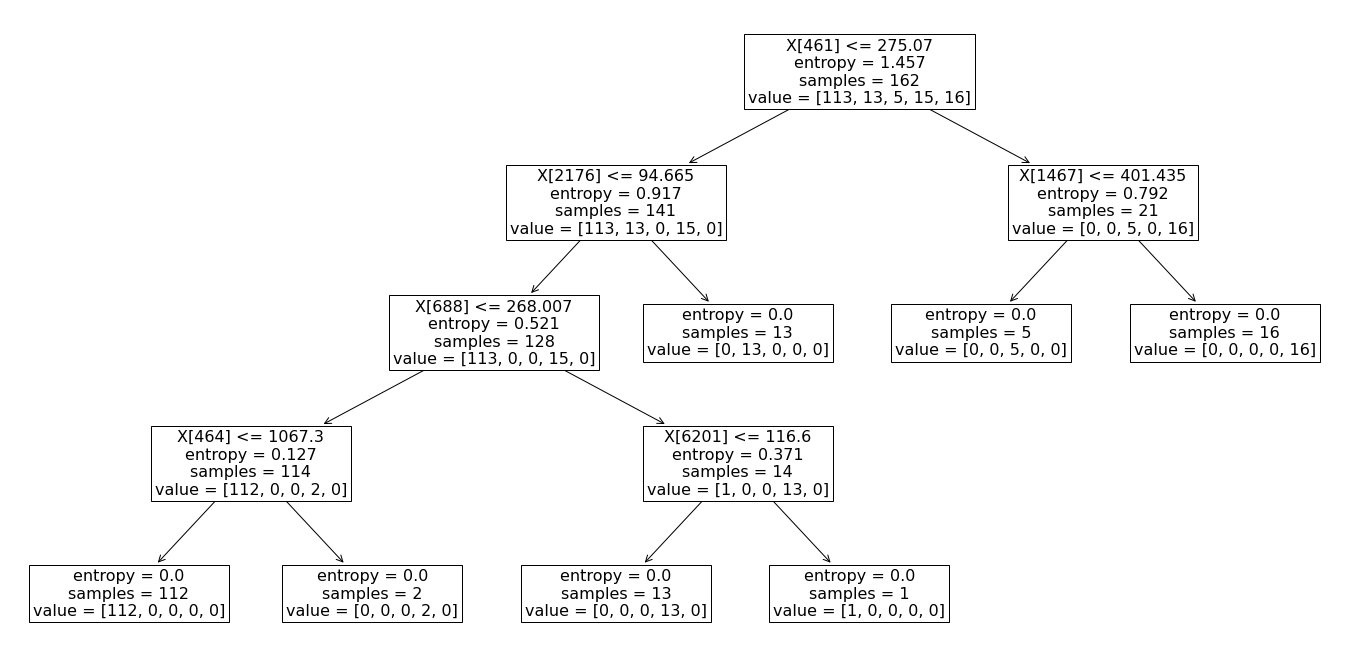

In [ ]:
plt.figure(figsize=(24,12))
tree.plot_tree(decision_tree, fontsize=16)

In [ ]:
test = np.asarray(X_train.iloc[:, 845])
print(test)
I = [i for i in range(len(test)) if test[i] <= 887.0]
print(y_train[I])

[262.195 311.51  146.32   42.34  460.46  234.83  310.8   219.77  352.48
 171.67  302.16  469.3    81.16   49.08  233.32  373.51  493.41  110.08
 256.195 722.49  244.285 384.27   68.97   60.93  243.24  382.04  129.94
 192.06   71.31  107.74  176.2   453.68  181.63  218.43   62.155 601.615
 404.498 568.06  398.31  138.72   65.36   83.56  162.86  617.77  207.53
 559.11  782.2   444.045 225.25  369.97  122.66   35.36  225.67  213.86
  92.63  134.95  418.55  744.377 335.915 405.96  407.28  352.96   96.76
 405.14  456.975 500.95  176.19  309.11  258.04  164.33  412.05  201.17
 125.52  530.12  147.65  557.075 237.92  205.65  292.87  402.63  203.27
 300.81  538.69  356.76  365.41  800.27  391.345 250.725 355.91  472.12
 137.68  123.72  737.95  -38.19  105.77  553.34  326.69  645.47   91.4
 348.84  496.7   220.16  410.15  286.23  600.785 257.17  294.515  76.52
 289.81  116.84  401.63   35.97  348.26  414.595 338.425 158.37  357.74
 405.98  179.02  291.37  239.58  205.26  127.44  215.43  401.68 

In [ ]:
predictions = decision_tree.predict(X_test)

print(accuracy_score(y_test, predictions))

0.9512195121951219


In [ ]:
# The 6 genes that the decision tree chose to use are 32650_at, 38177_at, 31791_at, 36174_at, 37333_at, and 40412_at.

In [ ]:
X.iloc[:,461]

0       133.81
1        88.75
2        82.01
3        48.17
4        74.96
        ...   
198    2125.99
199     865.08
200     298.58
201     344.92
202     947.96
Name: 32650_at , Length: 203, dtype: float64

In [ ]:
X.iloc[:,2176]

0     -36.40
1      10.18
2      19.90
3      -1.69
4      -9.07
       ...  
198    -2.40
199    93.06
200    21.70
201   -12.65
202   -29.20
Name: 38177_at , Length: 203, dtype: float64

In [ ]:
X.iloc[:,688]

0       3.250
1      10.180
2       2.690
3      13.325
4       8.150
        ...  
198    44.930
199     3.250
200    29.500
201    70.060
202     7.640
Name: 31791_at , Length: 203, dtype: float64

In [ ]:
X.iloc[:,581]

0      816.67
1      445.46
2      661.21
3      552.05
4      511.80
        ...  
198    488.28
199    561.83
200    211.69
201    542.83
202    322.61
Name: 36174_at , Length: 203, dtype: float64

In [ ]:
X.iloc[:,3934]

0       50.230
1       67.520
2       39.340
3      135.445
4       46.620
        ...   
198     85.750
199     45.620
200     45.100
201     73.620
202     63.310
Name: 37333_at , Length: 203, dtype: float64

In [ ]:
X.iloc[:,1374]

0       59.960
1       72.830
2       22.285
3      183.210
4       32.450
        ...   
198     60.440
199     29.100
200      2.640
201    121.710
202      9.080
Name: 40412_at , Length: 203, dtype: float64

In [ ]:
# K-Means Clustering
from sklearn.cluster import KMeans
random_state = 42
X = data.drop('label', axis = 1)
y = data.label

In [ ]:
kmeans_clf = KMeans(n_clusters=5, random_state=random_state)
y_pred = kmeans_clf.fit_predict(X.iloc[:,461:2176])

In [ ]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y, y_pred))

0.12315270935960591


Text(0.5, 1.0, 'Lung Cancer Dataset Prediction')

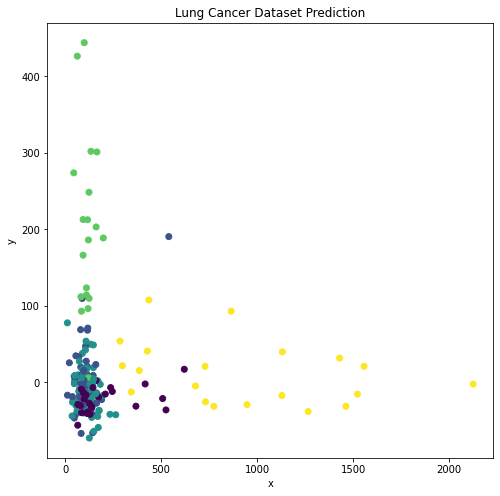

In [ ]:
plt.figure(figsize=(8, 8))
plt.scatter(X.iloc[:, 461], X.iloc[:, 2176], c=y_pred)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Lung Cancer Dataset Prediction')

Text(0.5, 1.0, 'Lung Cancer Dataset Ground-Truth')

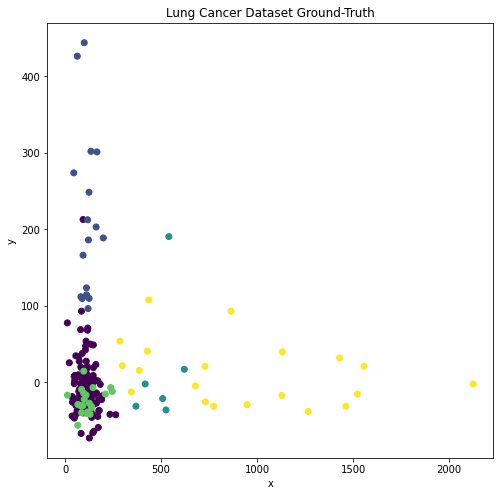

In [ ]:
plt.figure(figsize=(8, 8))
plt.scatter(X.iloc[:, 461], X.iloc[:, 2176], c=y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Lung Cancer Dataset Ground-Truth')

In [ ]:
from sklearn.metrics import accuracy_score
X = data.drop(columns ="label")
y = data.label
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
# Random forest
from sklearn.ensemble import RandomForestClassifier
# let's grow 1000 trees
clf = RandomForestClassifier(n_estimators=1000)
clf.fit(X_train, y_train)

classified_samples= clf.predict(X_test)
print(accuracy_score(y_test, classified_samples))

0.9215686274509803


# SVM

In [ ]:
from sklearn.metrics import accuracy_score
X = data.drop(columns ="label")
y = data.label
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

from sklearn.svm import SVC
classifier = SVC(kernel='rbf', random_state = 42)
classifier.fit(X_train,y_train)

y_pred_SVC = classifier.predict(X_test)
print(accuracy_score(y_test, y_pred_SVC))

0.8823529411764706


In [ ]:
print(accuracy_score(y_test, y_pred_SVC))

0.8823529411764706


In [ ]:
from sklearn.decomposition import PCA
X_pca = PCA(n_components=2).fit_transform(X)
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_pca, y, test_size=0.25)

In [ ]:
classifier_2 = SVC(kernel='rbf', random_state = 42)
classifier_2.fit(X_train_2,y_train_2)

y_pred_SVC_2 = classifier_2.predict(X_test_2)
print(accuracy_score(y_test_2, y_pred_SVC_2))

0.8627450980392157


/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


Text(0.5, 1.0, 'SVM Decision Region Boundary')

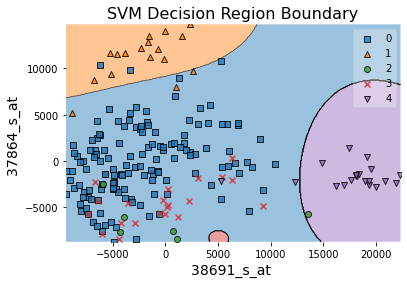

In [ ]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X=np.array(X_pca),
                      y=y.astype(np.int64).values,
                      clf=classifier_2)

# Update plot object with X/Y axis labels and Figure Title
plt.xlabel(X.columns[0], size=14)
plt.ylabel(X.columns[1], size=14)
plt.title('SVM Decision Region Boundary', size=16)